In [1]:
import matplotlib.pyplot as plt
import sys
import os

sys.path.append(r'/home/hcst/HCST_lib/ORCA/dcamsdk4/samples/python')

from dcam import *

In [2]:
"""Sample script for showing a captured image with dcam.py.

This script recognizes the camera and acquires a single image with dcam.py.
The acquired image is displayed with OpenCV.

This sample source code just shows how to use DCAM-API.
The performance is not guranteed.
"""

__date__ = '2021-06-18'
__copyright__ = 'Copyright (C) 2021-2024 Hamamatsu Photonics K.K.'

# import cv2
# pip install opencv-python
# Tested Version (Win/Lnx): 4.6.0.66/4.9.0.80
# License: Apache2 Software License (https://github.com/opencv/opencv/blob/master/LICENSE)
# for disply image

from dcam import *
# control DCAM functions

def dcamtest_show_framedata(data):
    """Show image data.

    Show numpy buffer as an image with OpenCV function.

    Args:
        data (void): NumPy array.

    Returns:
        Nothing.
    """
    if data.dtype == np.uint16:
        imax = np.amax(data)
        if imax > 0:
            imul = int(65535 / imax)
            # print('Multiple %s' % imul)
            data = data * imul

        plt.imshow(data)
    else:
        print('-NG: dcamtest_show_image(data) only support Numpy.uint16 data')


def dcam_show_single_captured_image(iDevice=0):
    """Show a single image.
    
    Capture and show a single image.

    Args:
        iDevice (int): Device index.

    Returns:
        Nothing.
    """
    if Dcamapi.init(): # this is failing for some reason, worked second time?
        dcam = Dcam(iDevice)
        if dcam.dev_open():
            if dcam.buf_alloc(1):
                if dcam.cap_snapshot():
                    timeout_milisec = 1000
                    while True:
                        if dcam.wait_capevent_frameready(timeout_milisec):
                            data = dcam.buf_getlastframedata()
                            dcamtest_show_framedata(data)
                            break

                        dcamerr = dcam.lasterr()
                        if dcamerr.is_timeout():
                            print('===: timeout')
                            continue

                        print('-NG: Dcam.wait_event() fails with error {}'.format(dcamerr))
                        break
                else:
                    print('-NG: Dcam.cap_start() fails with error {}'.format(dcam.lasterr()))

                dcam.buf_release()
            else:
                print('-NG: Dcam.buf_alloc(1) fails with error {}'.format(dcam.lasterr()))
            dcam.dev_close()
        else:
            print('-NG: Dcam.dev_open() fails with error {}'.format(dcam.lasterr()))
    else:
        print('-NG: Dcamapi.init() fails with error {}'.format(Dcamapi.lasterr()))

    Dcamapi.uninit()





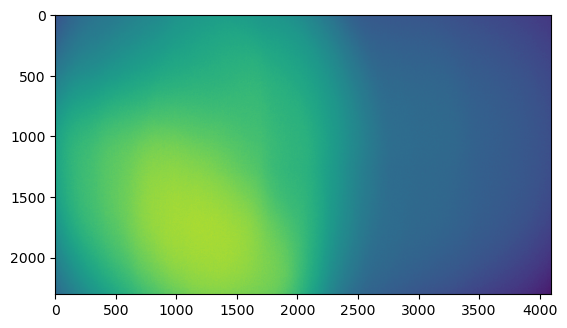

In [3]:
dcam_show_single_captured_image()


In [4]:
def dcam_show_device_list():
    """Show device list.
    
    Show model names ans IDs of the connected camera.

    Returns:
        Nothing.
    """
    if Dcamapi.init():
        n = Dcamapi.get_devicecount()
        for i in range(0, n):
            dcam = Dcam(i)
            output = '#{}: '.format(i)

            model = dcam.dev_getstring(DCAM_IDSTR.MODEL)
            if model is False:
                output = output + 'No DCAM_IDSTR.MODEL'
            else:
                output = output + 'MODEL={}'.format(model)

            cameraid = dcam.dev_getstring(DCAM_IDSTR.CAMERAID)
            if cameraid is False:
                output = output + ', No DCAM_IDSTR.CAMERAID'
            else:
                output = output + ', CAMERAID={}'.format(cameraid)

            print(output)
    else:
        print('-NG: Dcamapi.init() fails with error {}'.format(Dcamapi.lasterr()))


In [5]:
dcam_show_device_list()


#0: MODEL=C15550-20UP, CAMERAID=S/N: 000566


True

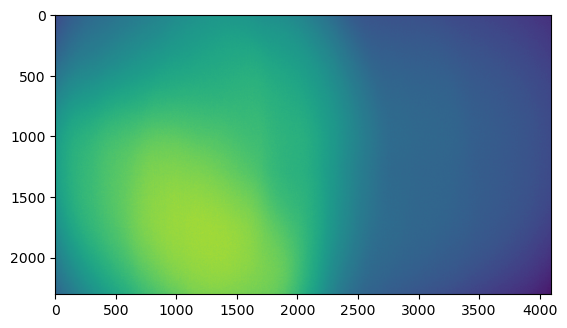

In [15]:
Dcamapi.init()
dcam = Dcam(0)
if dcam.dev_open():
    if dcam.buf_alloc(1):
        if dcam.cap_snapshot():
            timeout_milisec = 1000
            while True:
                if dcam.wait_capevent_frameready(timeout_milisec):
                    data = dcam.buf_getlastframedata()
                    dcamtest_show_framedata(data)
                    break

                dcamerr = dcam.lasterr()
                if dcamerr.is_timeout():
                    print('===: timeout')
                    continue

                print('-NG: Dcam.wait_event() fails with error {}'.format(dcamerr))
                break
        else:
            print('-NG: Dcam.cap_start() fails with error {}'.format(dcam.lasterr()))

        dcam.buf_release()
    else:
        print('-NG: Dcam.buf_alloc(1) fails with error {}'.format(dcam.lasterr()))
    dcam.dev_close()
else:
    print('-NG: Dcam.dev_open() fails with error {}'.format(dcam.lasterr()))


Dcamapi.uninit()